# Introdução e Objetivos

O projeto que abordado é baseado num conjunto de dados disponibilizado pelo clube de empréstimos LendingClub. Esses dados abordam o período de 2007 até 2010, o objetivo é prever se um determinado empréstimo foi completamente pago ou não, para isso faremos uso de Árvores de Decisão e de Florestas Aleatórias.

Este exemplo serve apenas como um demonstrativo para aplicação de Florestas aleatórias e Árvores de decisão, maiores considerações sobre esses métodos são feitas em outro momento.

Segue uma breve descrição dos campos do dataset:

* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito do LendingClub e 0 caso contrário.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: A taxa de juros do empréstimo, como proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários considerados pelo LendingClub como mais arriscados recebem taxas de juros mais altas.
* installment: As prestações mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O logarítmo natural da renda anual auto-relatada do mutuário.
* dti: O rácio dívida / rendimento do mutuário (montante da dívida dividido pelo rendimento anual).
* fico: A pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias que o mutuário tem uma linha de crédito.
* revol.bal: O saldo rotativo do mutuário (valor não pago no final do ciclo de faturamento do cartão de crédito).
* revol.util: A taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usado em relação ao crédito total disponível).
* inq.last.6mths: O número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: O número de vezes que o mutuário estava com mais de 30 dias de atraso em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (pedidos de falência, gravames fiscais ou julgamentos).

# Carregar as bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
sns.set()

In [4]:
loans = pd.read_csv('dadosEmprestimo.csv')

In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Análise exploratória de dados

Alguns gráficos foram construídos para o melhor entendimento do dataset.

Text(0.5, 0, 'FICO')

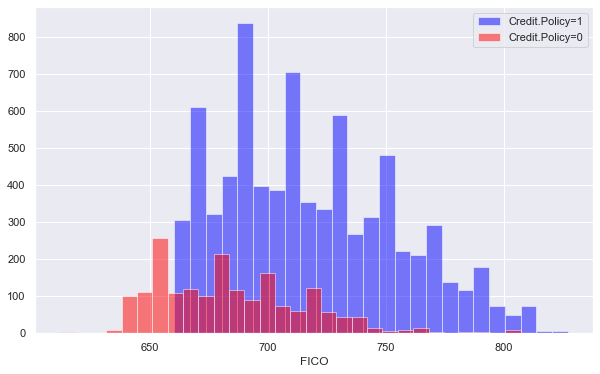

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

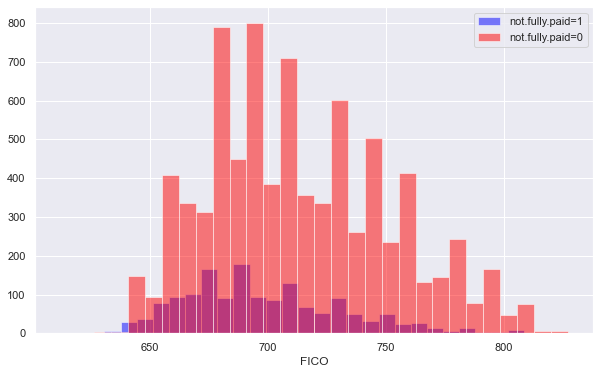

In [8]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

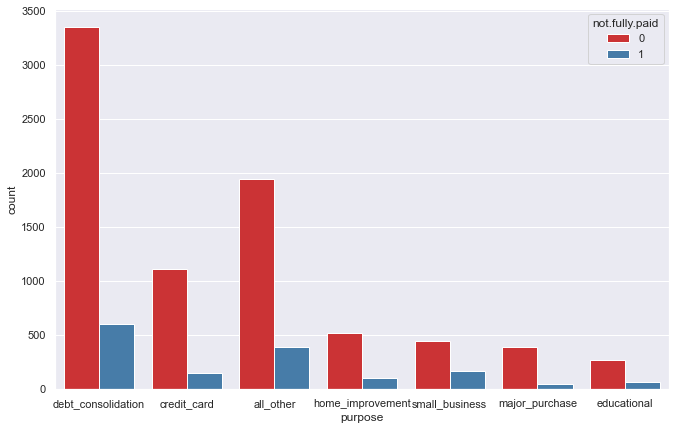

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

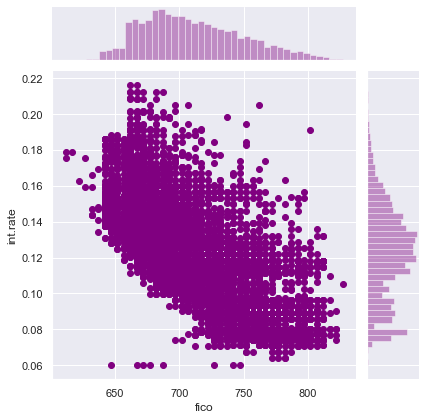

In [10]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 792x504 with 0 Axes>

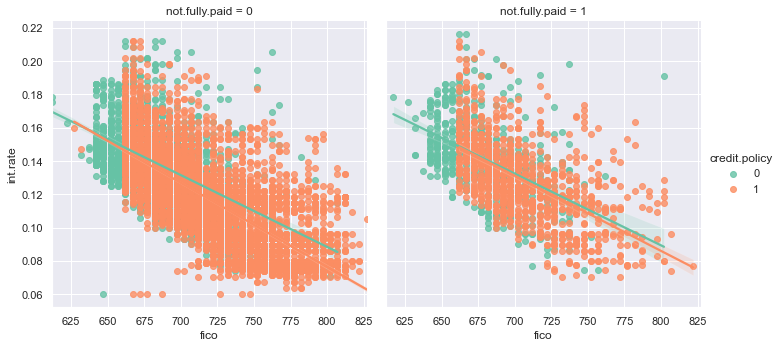

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set2')

## Arrumando os dados

Nesta parte foi transformada a variável categórica 'purpose'.

In [12]:
cat_feats = ['purpose']

In [13]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

Como padrão, divide-se conjunto de dados em um conjunto de teste e de treino. 

In [14]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Treinando a Árvore de decisão

Inicia-se o classificador de Árvore de Decisão. Em apresentações posteriores será mostrado como fazer o ajustes dos parâmetros.

In [15]:
dtree = DecisionTreeClassifier()

É feito o treino do classificador.

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Nesta parte, foi feita a previsão e exibição dos resultados.

In [17]:
predictions = dtree.predict(X_test)

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [19]:
print(confusion_matrix(y_test,predictions))

[[1990  441]
 [ 340  103]]


### Floresta aleatória

De maneira similar a anterior, é iniciado classificador de floresta aleatória, feita a previsão e o impresso o relatório.

In [20]:
rfc = RandomForestClassifier(n_estimators=600)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [22]:
predictions = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.61      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [24]:
print(confusion_matrix(y_test,predictions))

[[2424    7]
 [ 432   11]]


# Conclusão

A precisão do método de florestas aleatórias foi melhor que o de árvore de decisão, mas em compensação o recall foi pior. No caso, enfatiza-se que ainda há muitos ajustes possiveis de serem feitos para melhorar os resultados para ambos os lados. 